# Automated Ticket Classification Assignment:
+ Tushar Prasad

## Problem Statement 

You need to build a model that is able to classify customer complaints based on the products/services. By doing so, you can segregate these tickets into their relevant categories and, therefore, help in the quick resolution of the issue.

You will be doing topic modelling on the <b>.json</b> data provided by the company. Since this data is not labelled, you need to apply NMF to analyse patterns and classify tickets into the following five clusters based on their products/services:

* Credit card / Prepaid card

* Bank account services

* Theft/Dispute reporting

* Mortgages/loans

* Others 


With the help of topic modelling, you will be able to map each ticket onto its respective department/category. You can then use this data to train any supervised model such as logistic regression, decision tree or random forest. Using this trained model, you can classify any new customer complaint support ticket into its relevant department.

## Pipelines that needs to be performed:

You need to perform the following eight major tasks to complete the assignment:

1.  Data loading

2. Text preprocessing

3. Exploratory data analysis (EDA)

4. Feature extraction

5. Topic modelling 

6. Model building using supervised learning

7. Model training and evaluation

8. Model inference

## Importing the necessary libraries

In [168]:
import json 
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pandas.io.json import json_normalize

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import nltk
import warnings
warnings.filterwarnings('ignore')

## Loading the data

The data is in JSON format and we need to convert it to a dataframe.

In [8]:
# Opening JSON file 
f = open('complaints-2021-05-14_08_16.json')# Write the path to your data file and load it 
  
# returns JSON object as  
# a dictionary 
data = json.load(f)
try:
    df=json_normalize(data)
except:
    df=pd.json_normalize(data)

## Data preparation

In [9]:
# Inspect the dataframe to understand the given data.
df.head()

,_id,_index,_score,_source.company,_source.company_public_response,_source.company_response,_source.complaint_id,_source.complaint_what_happened,_source.consumer_consent_provided,_source.consumer_disputed,_source.date_received,_source.date_sent_to_company,_source.issue,_source.product,_source.state,_source.sub_issue,_source.sub_product,_source.submitted_via,_source.tags,_source.timely,_source.zip_code,_type
0,3211475,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,3211475,,Consent not provided,N/A,2019-04-13T12:00:00-05:00,2019-04-13T12:00:00-05:00,Attempts to collect debt not owed,Debt collection,CA,Debt is not yours,Credit card debt,Web,None,Yes,90301,complaint
1,3229299,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,3229299,Good morning my name is XXXX XXXX and I apprec...,Consent provided,N/A,2019-05-01T12:00:00-05:00,2019-05-01T12:00:00-05:00,Written notification about debt,Debt collection,GA,Didn't receive enough information to verify debt,Credit card debt,Web,Servicemember,Yes,319XX,complaint
2,3199379,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,3199379,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Consent provided,N/A,2019-04-02T12:00:00-05:00,2019-04-02T12:00:00-05:00,"Other features, terms, or problems",Credit card or prepaid card,TX,Problem with rewards from credit card,General-purpose credit card or charge card,Web,None,Yes,77069,complaint
3,2673060,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,2673060,,Consent not provided,N/A,2017-09-13T12:00:00-05:00,2017-09-14T12:00:00-05:00,Trouble during payment process,Mortgage,MI,None,Conventional home mortgage,Web,None,Yes,48066,complaint
4,3203545,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,3203545,,N/A,N/A,2019-04-05T12:00:00-05:00,2019-04-05T12:00:00-05:00,Fees or interest,Credit card or prepaid card,NY,Charged too much interest,General-purpose credit card or charge card,Referral,None,Yes,10473,complaint


In [10]:
## Finding the number of null values in each columns

df.isnull().sum()

_id                                      0
_index                                   0
_score                                   0
_source.company                          0
_source.company_public_response      78309
_source.company_response                 0
_source.complaint_id                     0
_source.complaint_what_happened          0
_source.consumer_consent_provided     1008
_source.consumer_disputed                0
_source.date_received                    0
_source.date_sent_to_company             0
_source.issue                            0
_source.product                          0
_source.state                         1991
_source.sub_issue                    46297
_source.sub_product                  10571
_source.submitted_via                    0
_source.tags                         67413
_source.timely                           0
_source.zip_code                      6757
_type                                    0
dtype: int64

In [11]:
### Finding the shape of the data

df.shape

(78313, 22)

In [12]:
#print the column names
print(df.columns)

Index(['_id', '_index', '_score', '_source.company', '_source.company_public_response', '_source.company_response', '_source.complaint_id', '_source.complaint_what_happened', '_source.consumer_consent_provided', '_source.consumer_disputed', '_source.date_received', '_source.date_sent_to_company', '_source.issue', '_source.product', '_source.state', '_source.sub_issue', '_source.sub_product', '_source.submitted_via', '_source.tags', '_source.timely', '_source.zip_code', '_type'], dtype='object')


In [13]:
#Assign new column names
df.columns = df.columns.str.lower().str.replace('_source.', 'source_')

In [14]:
df.rename(columns ={'_index': 'index', '_type': 'type', '_id': 'id', '_score': 'score'}, inplace = True)

In [15]:
df.head()

,id,index,score,source_company,source_company_public_response,source_company_response,source_complaint_id,source_complaint_what_happened,source_consumer_consent_provided,source_consumer_disputed,source_date_received,source_date_sent_to_company,source_issue,source_product,source_state,source_sub_issue,source_sub_product,source_submitted_via,source_tags,source_timely,source_zip_code,type
0,3211475,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,3211475,,Consent not provided,N/A,2019-04-13T12:00:00-05:00,2019-04-13T12:00:00-05:00,Attempts to collect debt not owed,Debt collection,CA,Debt is not yours,Credit card debt,Web,None,Yes,90301,complaint
1,3229299,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,3229299,Good morning my name is XXXX XXXX and I apprec...,Consent provided,N/A,2019-05-01T12:00:00-05:00,2019-05-01T12:00:00-05:00,Written notification about debt,Debt collection,GA,Didn't receive enough information to verify debt,Credit card debt,Web,Servicemember,Yes,319XX,complaint
2,3199379,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,3199379,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Consent provided,N/A,2019-04-02T12:00:00-05:00,2019-04-02T12:00:00-05:00,"Other features, terms, or problems",Credit card or prepaid card,TX,Problem with rewards from credit card,General-purpose credit card or charge card,Web,None,Yes,77069,complaint
3,2673060,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,2673060,,Consent not provided,N/A,2017-09-13T12:00:00-05:00,2017-09-14T12:00:00-05:00,Trouble during payment process,Mortgage,MI,None,Conventional home mortgage,Web,None,Yes,48066,complaint
4,3203545,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,3203545,,N/A,N/A,2019-04-05T12:00:00-05:00,2019-04-05T12:00:00-05:00,Fees or interest,Credit card or prepaid card,NY,Charged too much interest,General-purpose credit card or charge card,Referral,None,Yes,10473,complaint


In [16]:
#Assign nan in place of blanks in the complaints column
df['source_complaint_what_happened'] = df['source_complaint_what_happened'].replace(r'^\s*$', np.nan, regex=True)

In [17]:
#Remove all rows where complaints column is nan
df = df[~df['source_complaint_what_happened'].isnull()]

In [18]:
df.reset_index(inplace=True)

In [19]:
df = df.drop(columns=['level_0'])

In [20]:
df.shape

(21072, 22)

In [21]:
df.head()

,id,index,score,source_company,source_company_public_response,source_company_response,source_complaint_id,source_complaint_what_happened,source_consumer_consent_provided,source_consumer_disputed,source_date_received,source_date_sent_to_company,source_issue,source_product,source_state,source_sub_issue,source_sub_product,source_submitted_via,source_tags,source_timely,source_zip_code,type
0,3229299,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,3229299,Good morning my name is XXXX XXXX and I apprec...,Consent provided,N/A,2019-05-01T12:00:00-05:00,2019-05-01T12:00:00-05:00,Written notification about debt,Debt collection,GA,Didn't receive enough information to verify debt,Credit card debt,Web,Servicemember,Yes,319XX,complaint
1,3199379,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,3199379,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Consent provided,N/A,2019-04-02T12:00:00-05:00,2019-04-02T12:00:00-05:00,"Other features, terms, or problems",Credit card or prepaid card,TX,Problem with rewards from credit card,General-purpose credit card or charge card,Web,None,Yes,77069,complaint
2,3233499,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,3233499,Chase Card was reported on XX/XX/2019. However...,Consent provided,N/A,2019-05-06T12:00:00-05:00,2019-05-06T12:00:00-05:00,Incorrect information on your report,"Credit reporting, credit repair services, or o...",NY,Information belongs to someone else,Other personal consumer report,Web,None,Yes,104XX,complaint
3,3180294,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,3180294,"On XX/XX/2018, while trying to book a XXXX XX...",Consent provided,N/A,2019-03-14T12:00:00-05:00,2019-03-15T12:00:00-05:00,Incorrect information on your report,"Credit reporting, credit repair services, or o...",TX,Information belongs to someone else,Credit reporting,Web,None,Yes,750XX,complaint
4,3224980,complaint-public-v2,0.0,JPMORGAN CHASE & CO.,None,Closed with explanation,3224980,my grand son give me check for {$1600.00} i de...,Consent provided,N/A,2019-04-27T12:00:00-05:00,2019-04-27T12:00:00-05:00,Managing an account,Checking or savings account,CA,Funds not handled or disbursed as instructed,Checking account,Web,None,Yes,920XX,complaint


## Prepare the text for topic modeling

Once you have removed all the blank complaints, you need to:

* Make the text lowercase
* Remove text in square brackets
* Remove punctuation
* Remove words containing numbers


Once you have done these cleaning operations you need to perform the following:
* Lemmatize the texts
* Use POS tags to get relevant words from the texts.


In [22]:
def clean_text(text):
    text = text.lower()
    pattern = re.compile('(\[).*?(\])')
    text = re.sub(pattern, '', text)
    pattern = re.compile('[^\w\s]')
    text = re.sub(pattern, '', text)
    pattern = re.compile('[0-9]')
    text = re.sub(pattern, '', text)
    return text

In [23]:
#Write your function to Lemmatize the texts
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')

wordnet_lemmatizer = WordNetLemmatizer()

def get_lemmatized_text(sentence):

    lemma = []
    review1=nlp(sentence,disable=["parser", "ner"])
    for tok in review1:
        lemma.append(tok.lemma_)

    lemma = " ".join(lemma)
    return(lemma)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tushar.prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tushar.prasad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

In [25]:
#Create a dataframe('df_clean') that will have only the complaints and the lemmatized complaints 
df_clean = pd.DataFrame()
df_clean['complaints'] = df['source_complaint_what_happened'].apply(lambda x: clean_text(x))
df_clean['lemmatized_complaints'] = df_clean['complaints'].progress_apply(lambda x :get_lemmatized_text(x))

  0%|          | 0/21072 [00:00<?, ?it/s]

In [26]:
#Write your function to extract the POS tags 

def get_extract_pos_text(sentence):

    pos_text = []
    review1=nlp(sentence,disable=["parser", "ner"])
    for tok in review1:
        if tok.pos_ == 'NOUN':
            pos_text.append(tok.lemma_)

    pos_text = " ".join(pos_text)
    return(pos_text)

In [27]:
#The clean dataframe should now contain the raw complaint, lemmatized complaint and the complaint after removing POS tags.
df_clean['complaint_POS_removed'] = df_clean['lemmatized_complaints'].progress_apply(lambda x :get_extract_pos_text(x))

  0%|          | 0/21072 [00:00<?, ?it/s]

## Exploratory data analysis to get familiar with the data.

Write the code in this task to perform the following:

*   Visualise the data according to the 'Complaint' character length
*   Using a word cloud find the top 40 words by frequency among all the articles after processing the text
*   Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text. ‘




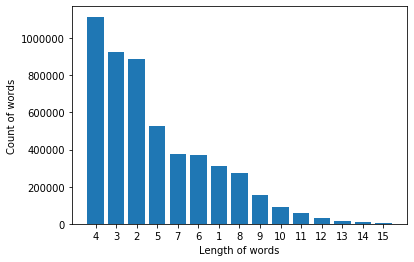

In [169]:
# Write your code here to visualise the data according to the 'Complaint' character length
from collections import Counter
import matplotlib.pyplot as plt

char_lens = [len(word) for sentence in df_clean['complaints'] for word in sentence.split()]
my_count = Counter(char_lens)

tuple1 = my_count.most_common(40)

# labels, values = zip(*(my_count).items())

labels = []
values = []

for i in tuple1:
    labels.append(i[0])
    values.append(i[1])

## Finding out the top 15 lengths

labels = labels[0:15]
values = values[0:15]

indexes = np.arange(len(labels))

#plt.bar(indexes, values, width)
plt.bar(indexes, values)
plt.xticks(indexes, labels)
plt.xlabel("Length of words")
plt.ylabel("Count of words")
plt.show();

#### Find the top 40 words by frequency among all the articles after processing the text.

In [32]:
count_word = [word for sentence in df_clean['complaint_POS_removed'] for word in sentence.split()]
word_counter = Counter(count_word )

tuple1 = word_counter.most_common(40)

dict1 = {}

for i in tuple1:
    dict1[i[0]] = i[1]

In [33]:
## 40 most common words by frequencty

tuple1

[('xxxx', 142956),
 ('chase', 54298),
 ('account', 47243),
 ('credit', 33385),
 ('card', 29638),
 ('payment', 21173),
 ('bank', 20282),
 ('time', 16045),
 ('xxxxxxxx', 15221),
 ('charge', 14293),
 ('day', 13214),
 ('money', 11938),
 ('check', 11330),
 ('loan', 10889),
 ('information', 9648),
 ('letter', 9618),
 ('fee', 8885),
 ('report', 8852),
 ('transaction', 8646),
 ('number', 8619),
 ('month', 8512),
 ('call', 8495),
 ('year', 8383),
 ('amount', 8381),
 ('customer', 8163),
 ('mortgage', 8076),
 ('balance', 7729),
 ('company', 7615),
 ('phone', 7615),
 ('service', 7532),
 ('state', 7341),
 ('claim', 7254),
 ('fund', 7044),
 ('fraud', 6925),
 ('issue', 6640),
 ('date', 6171),
 ('email', 6156),
 ('dispute', 5926),
 ('business', 5509),
 ('name', 5277)]

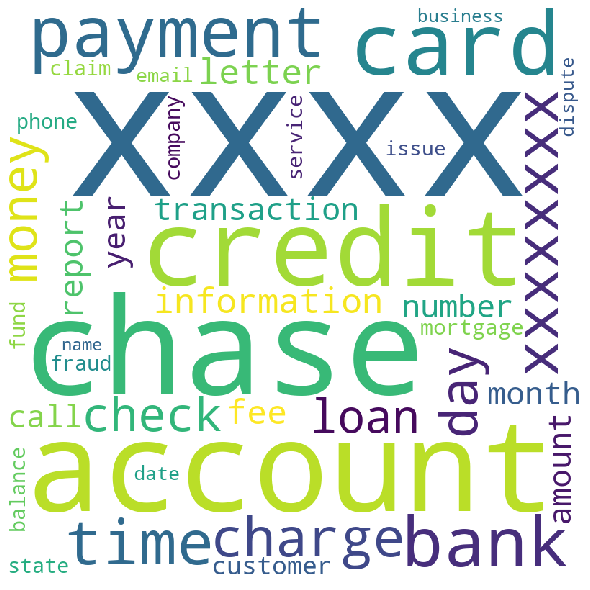

In [170]:
#Using a word cloud find the top 40 words by frequency among all the articles after processing the text

from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate_from_frequencies(frequencies=dict1)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [35]:
#Removing -PRON- from the text corpus
df_clean['Complaint_clean'] = df_clean['complaint_POS_removed'].str.replace('-PRON-', '')

#### Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams

In [37]:
#Write your code here to find the top 30 unigram frequency among the complaints in the cleaned datafram(df_clean). 

c_vec = CountVectorizer(ngram_range=(1, 1),)
ngrams = c_vec.fit_transform(df_clean['Complaint_clean'])

vocab = c_vec.vocabulary_
count_values = ngrams.toarray().sum(axis=0)

uni_top30 = sorted([(count_values[i],k) for k,i in vocab.items()],reverse=True)[0:30]

142956 xxxx
54298 chase
47243 account
33385 credit
29638 card
21173 payment
20282 bank
16045 time
15221 xxxxxxxx
14293 charge


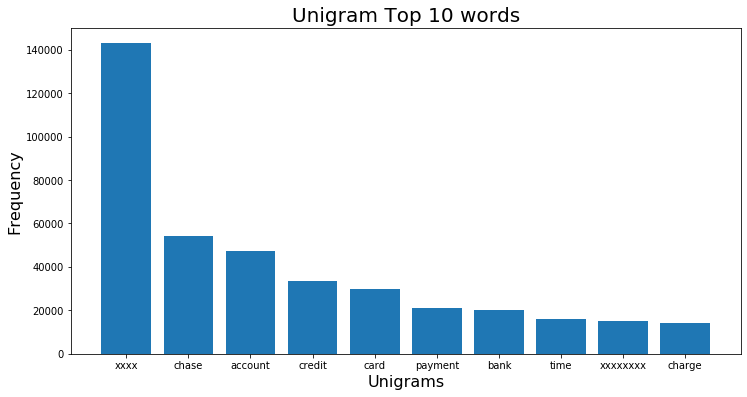

In [171]:
#Print the top 10 words in the unigram frequency and visualisation

labels = []
values = []

for ng_count, ng_text in uni_top30[0:10]:
    print(ng_count, ng_text)
    labels.append(ng_text)
    values.append(ng_count)
       
    
fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(labels, values)
ax.set_title('Unigram Top 10 words', fontsize=20)
ax.set_xlabel('Unigrams', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)

plt.show()

In [72]:
count_word = [word for sentence in df_clean['Complaint_clean'] for word in sentence.split()]

In [73]:
#Write your code here to find the top 30 bigram frequency among the complaints in the cleaned datafram(df_clean). 
from nltk.util import ngrams

bi_grams = list(ngrams(count_word, 2)) 
counter = Counter(bi_grams)
bigram_30 = counter.most_common(30)

[(('xxxx', 'xxxx'), 64782), (('credit', 'card'), 12669), (('xxxx', 'chase'), 4173), (('credit', 'report'), 3964), (('account', 'xxxx'), 3164), (('customer', 'service'), 3079), (('chase', 'credit'), 2910), (('xxxx', 'account'), 2851), (('account', 'chase'), 2844), (('chase', 'account'), 2600)]
64782 ('xxxx', 'xxxx')
12669 ('credit', 'card')
4173 ('xxxx', 'chase')
3964 ('credit', 'report')
3164 ('account', 'xxxx')
3079 ('customer', 'service')
2910 ('chase', 'credit')
2851 ('xxxx', 'account')
2844 ('account', 'chase')
2600 ('chase', 'account')


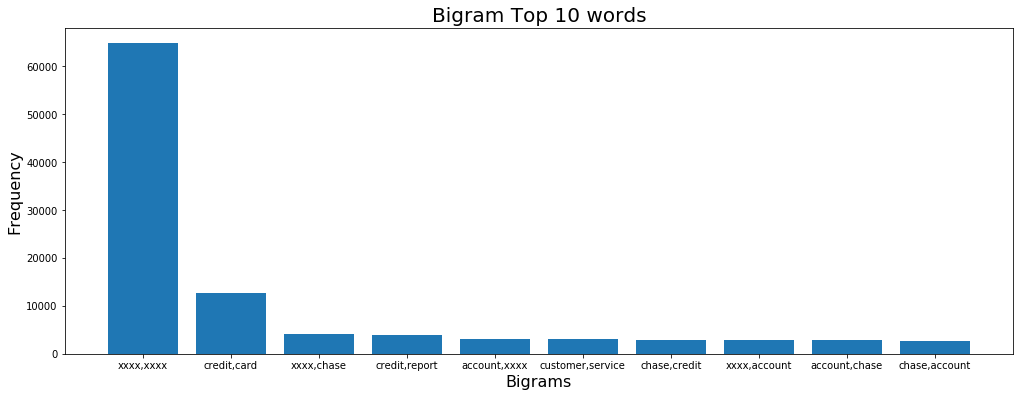

In [172]:
#Print the top 10 words in the bigram frequency and visualisation
print(bigram_30[0:10])

labels = []
values = []

for ng_text, ng_count in bigram_30[0:10]:
    print(ng_count, ng_text)
    labels.append(ng_text[0]+','+ng_text[1])
    values.append(ng_count)
       
    
fig, ax = plt.subplots(figsize=(17, 6))

ax.bar(labels, values)
ax.set_title('Bigram Top 10 words', fontsize=20)
ax.set_xlabel('Bigrams', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)

plt.show()

In [92]:
#Write your code here to find the top 30 trigram frequency among the complaints in the cleaned datafram(df_clean). 

tri_grams = list(ngrams(count_word, 3)) 
counter = Counter(tri_grams)
trigram_30 = counter.most_common(30)

[(('xxxx', 'xxxx', 'xxxx'), 34366), (('chase', 'credit', 'card'), 1936), (('xxxx', 'xxxx', 'chase'), 1617), (('account', 'xxxx', 'xxxx'), 1156), (('xxxx', 'xxxx', 'account'), 1093), (('credit', 'card', 'account'), 1075), (('xxxx', 'credit', 'card'), 1039), (('_', '_', '_'), 1020), (('credit', 'card', 'company'), 981), (('xxxxxxxx', 'xxxx', 'xxxx'), 928)]
34366 ('xxxx', 'xxxx', 'xxxx')
1936 ('chase', 'credit', 'card')
1617 ('xxxx', 'xxxx', 'chase')
1156 ('account', 'xxxx', 'xxxx')
1093 ('xxxx', 'xxxx', 'account')
1075 ('credit', 'card', 'account')
1039 ('xxxx', 'credit', 'card')
1020 ('_', '_', '_')
981 ('credit', 'card', 'company')
928 ('xxxxxxxx', 'xxxx', 'xxxx')


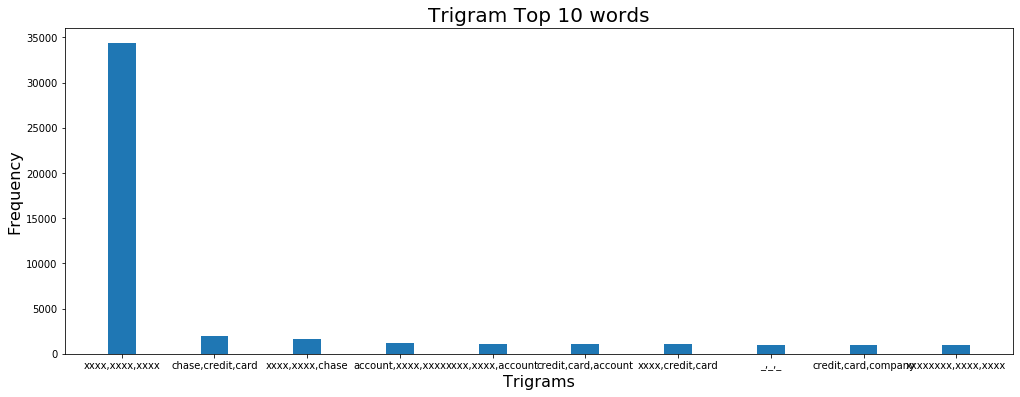

In [173]:
#Print the top 10 words in the trigram frequency and visualisation
print(trigram_30[0:10])

labels = []
values = []

for ng_text, ng_count in trigram_30[0:10]:
    print(ng_count, ng_text)
    labels.append(ng_text[0]+','+ng_text[1]+','+ng_text[2])
    values.append(ng_count)
       
    
fig, ax = plt.subplots(figsize=(17, 6))

ax.bar(labels, values,width=0.3)
ax.set_title('Trigram Top 10 words', fontsize=20)
ax.set_xlabel('Trigrams', fontsize=16)
ax.set_ylabel('Frequency', fontsize=16)

plt.show()

## The personal details of customer has been masked in the dataset with xxxx. Let's remove the masked text as this will be of no use for our analysis

In [102]:
df_clean['Complaint_clean'] = df_clean['Complaint_clean'].str.replace('xxxx','')

In [103]:
#All masked texts has been removed
df_clean

,complaints,lemmatized_complaints,complaint_POS_removed,Complaint_clean
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name xxxx stop debt verification state...,morning name stop debt verification statement...
1,i upgraded my xxxx xxxx card in xxxx and was t...,I upgrade my xxxx xxxx card in xxxx and be tel...,xxxx xxxx card agent anniversary date agent in...,card agent anniversary date agent informatio...
2,chase card was reported on xxxx however fraudu...,chase card be report on xxxx however fraudulen...,chase report application identity consent serv...,chase report application identity consent serv...
3,on xxxx while trying to book a xxxx xxxx tic...,on xxxx while try to book a xxxx xxxx tick...,xxxx xxxx ticket offer ticket reward card info...,ticket offer ticket reward card information ...
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund chase bank close accoun...,son chase account fund chase bank close accoun...
5,can you please remove inquiry,can you please remove inquiry,inquiry,inquiry
6,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restrict my ac...,notice jp account debit card branch customer s...,notice jp account debit card branch customer s...
7,during the summer months i experience a declin...,during the summer month I experience a decline...,summer month decline income employment month p...,summer month decline income employment month p...
8,on xxxx xxxx i made a payment to an online re...,on xxxx xxxx I make a payment to an online r...,xxxx xxxx payment retailer use chase pay xxxx ...,payment retailer use chase pay chase websit...
9,i have a chase credit card which is incorrectl...,I have a chase credit card which be incorrectl...,credit card datum credit report company issue,credit card datum credit report company issue


## Feature Extraction
Convert the raw texts to a matrix of TF-IDF features

**max_df** is used for removing terms that appear too frequently, also known as "corpus-specific stop words"
max_df = 0.95 means "ignore terms that appear in more than 95% of the complaints"

**min_df** is used for removing terms that appear too infrequently
min_df = 2 means "ignore terms that appear in less than 2 complaints"

In [104]:
#Write your code here to initialise the TfidfVectorizer 
tfidf = TfidfVectorizer(max_df=0.95,min_df=2)


#### Create a document term matrix using fit_transform

The contents of a document term matrix are tuples of (complaint_id,token_id) tf-idf score:
The tuples that are not there have a tf-idf score of 0

In [105]:
#Write your code here to create the Document Term Matrix by transforming the complaints column present in df_clean.
dtm = tfidf.fit_transform(df_clean['Complaint_clean'])

In [39]:
pd.DataFrame(dtm.toarray(), columns=tfidf.get_feature_names())

,aa,aaarating,aarp,ab,aba,abandonment,abatement,abbreviation,abd,abide,ability,about,abovementione,abovereference,absence,absent,absolve,absurdity,abundance,abuse,abuser,ac,acc,acccount,acceleration,accent,accept,acceptance,access,accessibility,accessory,accident,accommodation,accomodation,accompany,accomplice,accont,accord,accordance,according,accou,accouint,accoun,account,accountability,accountant,accountbalance,accountchase,accountholder,accounti,accounting,accountit,accountlevel,accountone,accountplease,accout,accredit,accrual,accrue,acct,accumulate,accumulation,accunt,accuracy,accurateness,accusation,accuse,ach,acion,acivity,ack,acknowledge,acknowledgement,acknowledgment,acocunt,acoount,acount,acquaintance,acquire,acquisition,acre,acreage,acronym,act,acting,action,activate,activation,activity,actor,actuality,ad,ada,add,addendum,addict,addition,addl,addre,address,addressee,addtl,adequacy,adherence,adhesion,adjudicate,adjudication,adjust,adjuster,adjustment,adjustor,admin,administer,administration,administrator,adminstrator,admission,admit,admittance,adoption,adress,adult,adulthood,adv,advance,advancement,advantage,advent,advert,advertise,advertisement,advertiser,advertising,advertisment,advice,advise,advisement,adviser,advising,advisor,advocacy,advocate,aes,aff,affadavit,affair,affect,affiant,affidavit,affiliate,affiliation,affirmation,afford,affordability,affordable,aforementione,aftermath,afternoon,afterthefact,again,againi,againt,age,agency,agencys,agenda,agent,aggravation,aggreement,aggregate,aggression,agian,agility,agin,agoi,agony,agree,agreedupon,agreement,agreementcontract,agriculture,aid,ail,ailment,aim,aimachine,air,aircraft,airfare,airline,airplane,airport,airway,ak,alarm,alcohol,ale,alert,alerting,alertsemail,algorithm,alia,alias,alibi,alien,align,alignment,alimony,alist,alledge,allegation,allege,alliance,alll,allocation,allonge,allot,allotment,allow,allowance,alltime,allude,allusion,ally,alot,alotte,alter,alteration,altercation,alteringmodifye,alternative,altitude,am,amazement,amazon,amazonchase,amazoncom,amazoncomchase,ambiguity,ambulance,amend,amendment,amenity,american,ammount,amortization,amortize,amount,amout,amoutn,...,violate,violating,violation,violence,vip,virtue,virus,visa,visachase,visamc,visibility,vision,visit,visitor,visor,visual,vitamin,vitiate,vm,vmail,voice,voicemail,void,voip,volume,volunteer,vote,voucher,vp,vpbranch,vulnerability,vulture,wa,wad,wade,wage,wager,waist,wait,waiter,waiting,waitress,waive,waiver,waiving,wake,walk,walker,walkin,walkthrough,wall,wallet,walmartcom,wamu,wamuchase,wamus,want,wanton,war,ward,warehouse,warn,warning,warrant,warrantee,warranty,was,wash,washer,washerdryer,washing,wasis,wasn,waste,watch,watchdog,water,wave,wax,way,wchase,weakness,wealth,weapon,wear,weather,web,weblink,webpage,website,wedding,wednesday,week,weekday,weekend,weekly,weigh,weight,welcome,welfare,well,wellaware,wellbee,wellbeing,wellknown,wellness,wen,wer,wesbite,west,wether,whack,whammy,whe,wheel,wheelchair,when,wher,whereabout,whereabouts,whi,whic,which,while,whim,whip,whirlwind,whistle,whistleblower,whit,whitout,whoi,whole,wholesaler,whomever,wich,widow,widower,wierd,wife,wifes,wifi,wig,wildfire,will,willingness,win,wind,windfall,window,windshield,wine,winter,wipe,wire,wireless,wiretransfer,wiring,wisconsin,wish,wit,witch,with,withdraw,withdrawal,withdrawing,withdrawl,withe,wither,withhold,withholding,withi,withstand,witness,wk,wme,woe,woman,wonder,wood,word,wording,work,workday,worker,workforce,working,workingclass,workmanship,workout,workplace,worksheet,workshop,world,worng,worry,worsen,worth,worthiness,worthlessness,woukd,wouldbe,wound,wout,wrangler,wrap,wreck,wright,wrist,wristband,writ,write,writeoff,writer,writing,writte,wrong,wrongdoe,wrongdoing,ws,wth,wwwchasecom,wwwconsumerfinancegov,wwwftccom,wwwftcgovenforcementrulesrulemakingregulatoryreformproceedingsfairdebtcollectionpracticesacttext,wwwjusticegovopclpaoverview_sourcebook,xx,xxx,yank,yard,ye,yea,year,yearold,yell,yellow,yelp,yest

In [40]:
tfidf.get_feature_names()

['aa',
 'aaarating',
 'aarp',
 'ab',
 'aba',
 'abandonment',
 'abatement',
 'abbreviation',
 'abd',
 'abide',
 'ability',
 'about',
 'abovementione',
 'abovereference',
 'absence',
 'absent',
 'absolve',
 'absurdity',
 'abundance',
 'abuse',
 'abuser',
 'ac',
 'acc',
 'acccount',
 'acceleration',
 'accent',
 'accept',
 'acceptance',
 'access',
 'accessibility',
 'accessory',
 'accident',
 'accommodation',
 'accomodation',
 'accompany',
 'accomplice',
 'accont',
 'accord',
 'accordance',
 'according',
 'accou',
 'accouint',
 'accoun',
 'account',
 'accountability',
 'accountant',
 'accountbalance',
 'accountchase',
 'accountholder',
 'accounti',
 'accounting',
 'accountit',
 'accountlevel',
 'accountone',
 'accountplease',
 'accout',
 'accredit',
 'accrual',
 'accrue',
 'acct',
 'accumulate',
 'accumulation',
 'accunt',
 'accuracy',
 'accurateness',
 'accusation',
 'accuse',
 'ach',
 'acion',
 'acivity',
 'ack',
 'acknowledge',
 'acknowledgement',
 'acknowledgment',
 'acocunt',
 'acooun

## Topic Modelling using NMF

Non-Negative Matrix Factorization (NMF) is an unsupervised technique so there are no labeling of topics that the model will be trained on. The way it works is that, NMF decomposes (or factorizes) high-dimensional vectors into a lower-dimensional representation. These lower-dimensional vectors are non-negative which also means their coefficients are non-negative.

In this task you have to perform the following:

* Find the best number of clusters 
* Apply the best number to create word clusters
* Inspect & validate the correction of each cluster wrt the complaints 
* Correct the labels if needed 
* Map the clusters to topics/cluster names

In [108]:
from sklearn.decomposition import NMF

## Manual Topic Modeling
You need to do take the trial & error approach to find the best num of topics for your NMF model.

The only parameter that is required is the number of components i.e. the number of topics we want. This is the most crucial step in the whole topic modeling process and will greatly affect how good your final topics are.

In [109]:
#Load your nmf_model with the n_components i.e 5
num_topics = 5 #write the value you want to test out

#keep the random_state =40
nmf_model = NMF(n_components=num_topics,random_state=40)

In [110]:
#Fit NMF Model
nmf_model.fit(dtm)
len(tfidf.get_feature_names())

6915

In [111]:
W = nmf_model.fit_transform(dtm)  # Document-topic matrix
H = nmf_model.components_       # Topic-term matrix

In [112]:
#Print the Top15 words for each of the topics
words = np.array(tfidf.get_feature_names())
topic_words = pd.DataFrame(np.zeros((num_topics, 15)), index=[f'Topic {i + 1}' for i in range(num_topics)],
                           columns=[f'Word {i + 1}' for i in range(15)]).astype(str)
for i in range(num_topics):
    ix = H[i].argsort()[::-1][:15]
    topic_words.iloc[i] = words[ix]

topic_words

,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15
Topic 1,account,check,bank,money,chase,fund,deposit,branch,day,checking,transaction,number,business,transfer,claim
Topic 2,credit,report,card,inquiry,account,score,chase,company,debt,information,limit,application,reporting,letter,bureaus
Topic 3,payment,balance,interest,month,fee,statement,amount,day,time,bill,chase,auto,date,pay,credit
Topic 4,charge,card,chase,dispute,transaction,fee,purchase,fraud,merchant,credit,claim,service,time,email,call
Topic 5,loan,mortgage,chase,home,modification,property,year,letter,document,time,foreclosure,rate,house,sale,request


#### After evaluating the mapping, if the topics assigned are correct then assign these names to the relevant topic:
* Bank Account services
* Credit card or prepaid card
* Theft/Dispute Reporting
* Mortgage/Loan
* Others

In [113]:
#Create the dictionary of Topic names and Topics

topic_mapping = {
    'Topic 1': 'Bank Account Services',
    'Topic 2': 'Credit Card',
    'Topic 3': 'Others',
    'Topic 4': 'Theft/Dispute',
    'Topic 5': 'Loan/Mortgage'
}

In [114]:
colnames = ["Topic " + str(i+1) for i in range(nmf_model.n_components)]
#docnames = ["Doc" + str(i) for i in range(len(complaints_df.Text))]
df_doc_topic = pd.DataFrame(np.round(W, 2), columns=colnames)
df_doc_topic['significant_topic'] = df_doc_topic.apply(lambda x: topic_mapping.get(x.idxmax()), axis=1)

In [115]:
df_doc_topic

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,significant_topic
0,0.02,0.02,0.01,0.00,0.02,Bank Account Services
1,0.01,0.01,0.00,0.01,0.00,Bank Account Services
2,0.00,0.06,0.00,0.00,0.01,Credit Card
3,0.02,0.07,0.00,0.01,0.02,Credit Card
4,0.06,0.00,0.00,0.01,0.01,Bank Account Services
5,0.00,0.07,0.00,0.00,0.00,Credit Card
6,0.06,0.00,0.01,0.00,0.01,Bank Account Services
7,0.00,0.00,0.05,0.01,0.05,Others
8,0.03,0.00,0.00,0.06,0.02,Theft/Dispute
9,0.00,0.12,0.00,0.01,0.00,Credit Card


In [116]:
#Assign the best topic to each of the cmplaints in Topic Column

df_clean['Topic'] = df_doc_topic['significant_topic'] #write your code to assign topics to each rows.

In [117]:
df_clean.head()

,complaints,lemmatized_complaints,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name xxxx stop debt verification state...,morning name stop debt verification statement...,Bank Account Services
1,i upgraded my xxxx xxxx card in xxxx and was t...,I upgrade my xxxx xxxx card in xxxx and be tel...,xxxx xxxx card agent anniversary date agent in...,card agent anniversary date agent informatio...,Bank Account Services
2,chase card was reported on xxxx however fraudu...,chase card be report on xxxx however fraudulen...,chase report application identity consent serv...,chase report application identity consent serv...,Credit Card
3,on xxxx while trying to book a xxxx xxxx tic...,on xxxx while try to book a xxxx xxxx tick...,xxxx xxxx ticket offer ticket reward card info...,ticket offer ticket reward card information ...,Credit Card
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund chase bank close accoun...,son chase account fund chase bank close accoun...,Bank Account Services


In [118]:
#Print the first 5 Complaint for each of the Topics
df_clean_new = df_clean.groupby('Topic').head(5)
df_clean_new.sort_values('Topic')

,complaints,lemmatized_complaints,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name xxxx stop debt verification state...,morning name stop debt verification statement...,Bank Account Services
1,i upgraded my xxxx xxxx card in xxxx and was t...,I upgrade my xxxx xxxx card in xxxx and be tel...,xxxx xxxx card agent anniversary date agent in...,card agent anniversary date agent informatio...,Bank Account Services
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund chase bank close accoun...,son chase account fund chase bank close accoun...,Bank Account Services
6,with out notice jp morgan chase restricted my ...,with out notice jp morgan chase restrict my ac...,notice jp account debit card branch customer s...,notice jp account debit card branch customer s...,Bank Account Services
10,mishandling of this account by chase auto and ...,mishandle of this account by chase auto and xxxx,mishandle account auto xxxx,mishandle account auto,Bank Account Services
2,chase card was reported on xxxx however fraudu...,chase card be report on xxxx however fraudulen...,chase report application identity consent serv...,chase report application identity consent serv...,Credit Card
3,on xxxx while trying to book a xxxx xxxx tic...,on xxxx while try to book a xxxx xxxx tick...,xxxx xxxx ticket offer ticket reward card info...,ticket offer ticket reward card information ...,Credit Card
5,can you please remove inquiry,can you please remove inquiry,inquiry,inquiry,Credit Card
9,i have a chase credit card which is incorrectl...,I have a chase credit card which be incorrectl...,credit card datum credit report company issue,credit card datum credit report company issue,Credit Card
11,i have reached out to xxxx several times in at...,I have reach out to xxxx several time in attem...,xxxx time attempt inquiry remove creditor inqu...,time attempt inquiry remove creditor inquiry ...,Credit Card


## Supervised model to predict any new complaints to the relevant Topics.

You have now build the model to create the topics for each complaints.Now in the below section you will use them to classify any new complaints.

Since you will be using supervised learning technique we have to convert the topic names to numbers(numpy arrays only understand numbers)

In [119]:
#Create the dictionary again of Topic names and Topics

Topic_names = {
    'Bank Account Services' : 1,
    'Credit Card' : 2,
    'Others' : 3,
    'Theft/Dispute': 4,
    'Loan/Mortgage' : 5 }
#Replace Topics names with Topic.
df_clean['Topic'] = df_clean['Topic'].map(Topic_names)

In [162]:
df_clean.head()

,complaints,lemmatized_complaints,complaint_POS_removed,Complaint_clean,Topic
0,good morning my name is xxxx xxxx and i apprec...,good morning my name be xxxx xxxx and I apprec...,morning name xxxx stop debt verification state...,morning name stop debt verification statement...,1
1,i upgraded my xxxx xxxx card in xxxx and was t...,I upgrade my xxxx xxxx card in xxxx and be tel...,xxxx xxxx card agent anniversary date agent in...,card agent anniversary date agent informatio...,1
2,chase card was reported on xxxx however fraudu...,chase card be report on xxxx however fraudulen...,chase report application identity consent serv...,chase report application identity consent serv...,2
3,on xxxx while trying to book a xxxx xxxx tic...,on xxxx while try to book a xxxx xxxx tick...,xxxx xxxx ticket offer ticket reward card info...,ticket offer ticket reward card information ...,2
4,my grand son give me check for i deposit it i...,my grand son give I check for I deposit it i...,son chase account fund chase bank close accoun...,son chase account fund chase bank close accoun...,1


In [121]:
#Keep the columns"complaint_what_happened" & "Topic" only in the new dataframe --> training_data
training_data = pd.DataFrame()
training_data['Complaint_clean'] = df_clean['Complaint_clean']
training_data['Topic'] = df_clean['Topic']

In [122]:
training_data

,Complaint_clean,Topic
0,morning name stop debt verification statement...,1
1,card agent anniversary date agent informatio...,1
2,chase report application identity consent serv...,2
3,ticket offer ticket reward card information ...,2
4,son chase account fund chase bank close accoun...,1
5,inquiry,2
6,notice jp account debit card branch customer s...,1
7,summer month decline income employment month p...,3
8,payment retailer use chase pay chase websit...,4
9,credit card datum credit report company issue,2


#### Apply the supervised models on the training data created. In this process, you have to do the following:
* Create the vector counts using Count Vectoriser
* Transform the word vecotr to tf-idf
* Create the train & test data using the train_test_split on the tf-idf & topics


In [123]:
#Write your code to get the Vector count
#Write your code here to transform the word vector to tf-idf
from sklearn.feature_extraction.text import TfidfTransformer


count_vect = CountVectorizer(max_df=0.95,min_df=2)
X = count_vect.fit_transform(training_data['Complaint_clean'])
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X)


y= training_data['Topic']

You have to try atleast 2 models on the train & test data from these options:
* Logistic regression
* Decision Tree
* Random Forest
* Naive Bayes (optional)

**Using the required evaluation metrics judge the tried models and select the ones performing the best**

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

### Test-Train Split Dataset

In [125]:
# Write your code here to build any 3 models and evaluate them using the required metrics

X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=0.25, random_state=42)

## Naive Bayes Model

In [59]:
# Multinomial Naive Bayes - Base model
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [60]:
predicted = nb.predict(X_test)
result_bayes = pd.DataFrame( {'true_labels': y_test,'predicted_labels': predicted})

In [61]:
accuracy_score(y_test,predicted)

0.7919514047076689

+ Simple base naive bayes model gave us 79% accuracy
+ We can try to optimize the parameters and check for better results

In [62]:
nb_model = MultinomialNB()
alpha = [1, 0.5, 0.2, 0.1, 0.01]

grid_model_nb = GridSearchCV(nb_model,param_grid={'alpha':alpha})

In [63]:
grid_model_nb.fit(X_train,y_train)

GridSearchCV(estimator=MultinomialNB(),
             param_grid={'alpha': [1, 0.5, 0.2, 0.1, 0.01]})

In [64]:
grid_model_nb.best_params_

{'alpha': 0.2}

In [65]:
#Train accuracy
accuracy_score(y_train,grid_model_nb.predict(X_train))

0.8537711971652746

In [66]:
# Test Accuracy
accuracy_score(y_test,grid_model_nb.predict(X_test))

0.8033409263477601

### Logistic Regression Model
* As the traget values are 5 outcomes, We will use multinomial model

In [126]:
# Create base logistic regression mode
log_model = LogisticRegression(solver='saga',multi_class='multinomial')

In [127]:
log_model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial', solver='saga')

In [128]:
y_pred = log_model.predict(X_test)

In [129]:
accuracy_score(y_test,y_pred)

0.9578587699316629

In [130]:
accuracy_score(y_train,log_model.predict(X_train))

0.9860794735509998

#### Tune the model to further check for optimized results

In [174]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(-4, 4, 10)

In [182]:
log_model2 = LogisticRegression(solver='saga',multi_class='multinomial')

In [187]:
grid_model_lr = GridSearchCV(log_model2,param_grid={'C':[2.78255],'penalty':['l1']})

In [188]:
grid_model_lr.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(multi_class='multinomial',
                                          solver='saga'),
             param_grid={'C': [2.78255], 'penalty': ['l1']})

In [189]:
grid_model_lr.best_params_

{'C': 2.78255, 'penalty': 'l1'}

In [190]:
accuracy_score(y_train,grid_model_lr.predict(X_train))

0.9879144520374589

In [191]:
accuracy_score(y_test,grid_model_lr.predict(X_test))

0.9635535307517085

### Random Forest Ensemble Model 

In [84]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2,6,8, 10, 12],
    'n_estimators': [50,100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [85]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 15.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 27.9min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 41.3min finished


{'max_depth': 100,
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 300}

In [88]:
classifier = grid_search.best_estimator_

In [89]:
# classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=100, min_samples_leaf=2, min_samples_split=6,
                       n_estimators=300)

In [90]:
predicted = classifier.predict(X_test)

In [91]:
accuracy_score(y_test,predicted)

0.8726271829916477

## Custom Text Evaluation

#### You can enter you custom text here. For e.g we have entered a text related to mortgage payment.

In [192]:
text = "i received a notice from chase bank that they are increasing my mortgage payment by  per month due to an escrow analysis they did they said they require a  cushion  amount i did not apply for the mortgage through chase at closing my mortgage was sold to them there was no required  cushion  with the original lender i am a xxxx senior citizen on a fixed income and i can not afford the  per month increase now i fear i will lose my house i thought the increase was a result of removing my car from xxxx xxxx who also holds my homeowners policy so i put my car back with xxxx xxxx and sent the refund to chase bank for the escrow account but chase is now saying the  payment did not decrease the monthly mortgage payment please help"

In [193]:
custom_text = count_vect.transform(pd.Series(text))

custom_text = tfidf_transformer.transform(custom_text)

In [194]:
grid_model_lr.predict(custom_text)

array([5], dtype=int64)

In [195]:
Topic_names

{'Bank Account Services': 1,
 'Credit Card': 2,
 'Others': 3,
 'Theft/Dispute': 4,
 'Loan/Mortgage': 5}

#### We can clearly see that the topic is 5, which is supposed to be Loan/Mortgage, hence this way we can evaluate the model on custom uncleaned text as well.

## Conclusion

#### Test Accuracy for 3 models is given as:
* Naive Bayes : 80.33%
* Random Forest : 87.26%
* Logistic Regression : 96.35

We can clearly see logistic regression has outperform all the models 